## German Credit risk Analysis

## Overview

The project objective, is to predict if the person will pay or not his debt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data, and removing useless column

In [2]:
credit_data = pd.read_csv('../datasets/german_credit_data.csv')

In [3]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
credit_data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Looking some statistics, NaN values, and data types

In [6]:
credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


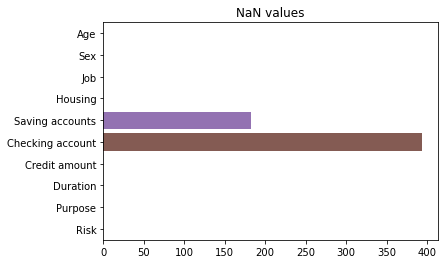

In [8]:
plt.title('NaN values')
sns.barplot(x=credit_data.isna().sum(), y=credit_data.columns);

## Cleaning NaN values, and changing Job type to object.

In [9]:
credit_data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [10]:
credit_data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [11]:
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

credit_data.Job = credit_data.Job.map({0:'unskilled_nr', 1:'unskilled_r', 2:'skilled', 3:'highly_skilled'})

It is possible to guess that NaN is the person that have no Checking/Saving accounts.

I will fill it as "None".

In [12]:
credit_data['Checking account'].fillna(value='None', inplace=True)

In [13]:
credit_data['Saving accounts'].fillna(value='None', inplace=True)

In [14]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


## Looking for correlated variables

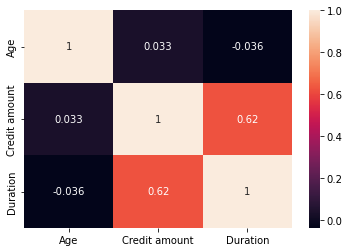

In [15]:
sns.heatmap(data=credit_data.corr(), annot=True);

Credit amount and Job are a little correlated, Duration and Job are a little correlated, and Duration is very correlated with Credit amount.

## Looking for variables distributions

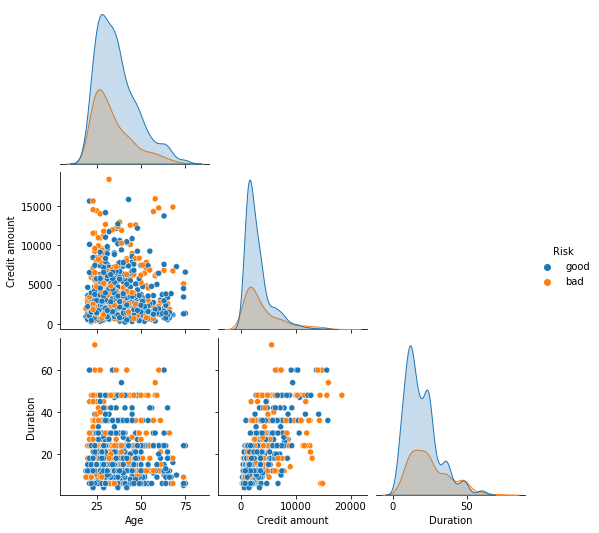

In [16]:
sns.pairplot(credit_data, corner=True, hue='Risk');

Looks like Credit amount with Duration have linear distribution

## Verifying histograms

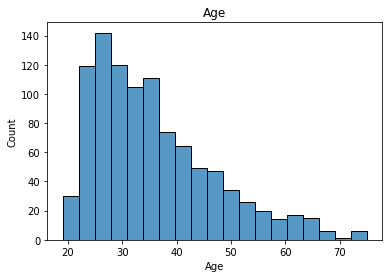

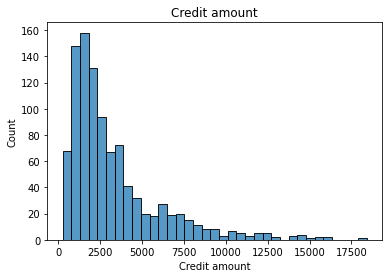

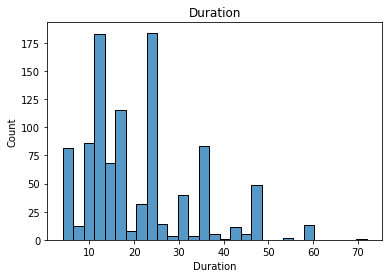

In [17]:
data_num = credit_data.select_dtypes(include='number')
data_cat = credit_data.select_dtypes(exclude='number')
for i in data_num.columns:
    sns.histplot(data_num[i])
    plt.title(i)
    plt.show()

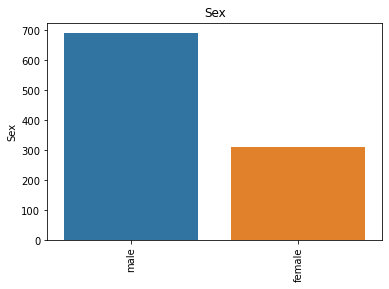

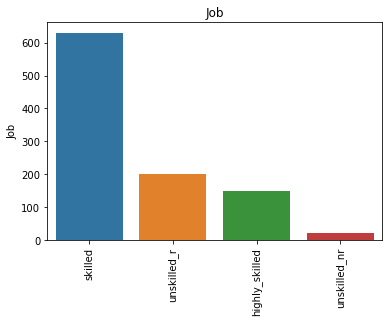

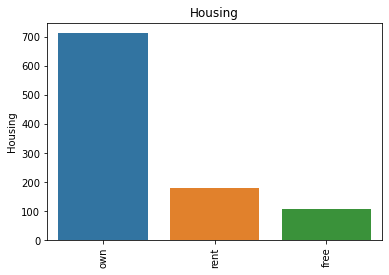

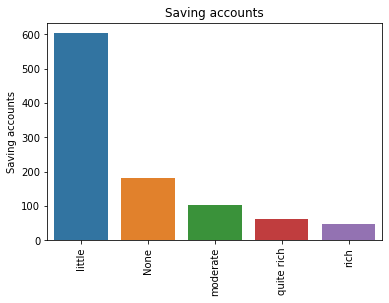

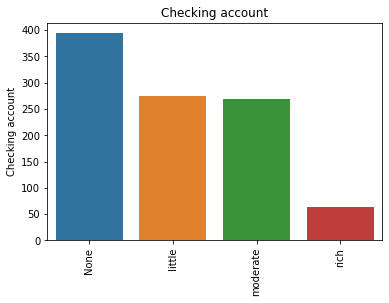

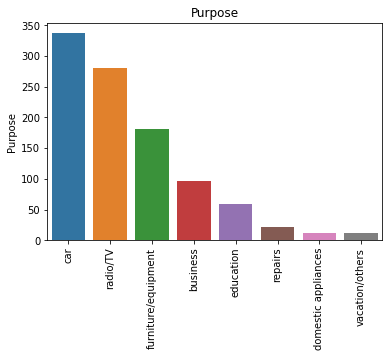

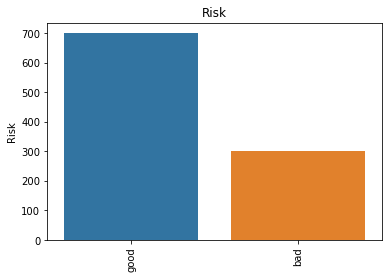

In [18]:
for i in data_cat.columns:
    sns.barplot(x=data_cat[i].value_counts().index,y=data_cat[i].value_counts()).set_title(i)
    plt.xticks(rotation=90)
    plt.show()

## The dataset is very unbalanced between classes and number value ranges

## Starting to do some EDA

In [19]:
crosstab_table = pd.crosstab(index=credit_data['Purpose'], columns=credit_data['Risk'])

print(crosstab_table)

Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


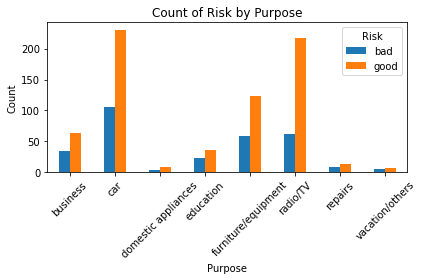

In [20]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

In [21]:
crosstab_table = pd.crosstab(index=credit_data['Housing'], columns=credit_data['Risk'])
print(crosstab_table)

Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109


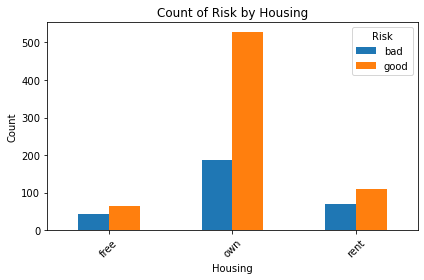

In [22]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who owns housing have less credit risk

In [23]:
crosstab_table = pd.crosstab(index=credit_data['Sex'], columns=credit_data['Risk'])
print(crosstab_table)

Risk    bad  good
Sex              
female  109   201
male    191   499


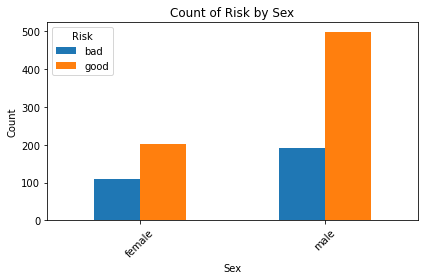

In [24]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## Male has less credit risk

In [25]:
crosstab_table = pd.crosstab(index=credit_data['Checking account'], columns=credit_data['Risk'])
print(crosstab_table)

Risk              bad  good
Checking account           
None               46   348
little            135   139
moderate          105   164
rich               14    49


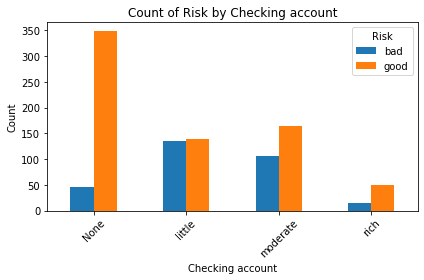

In [26]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Checking account')
plt.xlabel('Checking account')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who have no checking acount, and rich have less credit risk

In [27]:
crosstab_table = pd.crosstab(index=credit_data['Saving accounts'], columns=credit_data['Risk'])
print(crosstab_table)

Risk             bad  good
Saving accounts           
None              32   151
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


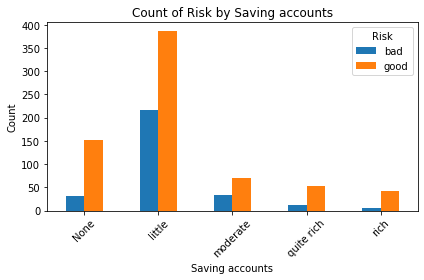

In [28]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Saving accounts')
plt.xlabel('Saving accounts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who have no saving acount, quite rich and rich have less credit risk

## Baseline model using, Random Forest and SVC, because data is unbalanced

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier